In [122]:
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
from Data import Data
import pickle
from mpl_toolkits.basemap import Basemap
plt.rcParams["figure.figsize"] = (20,10)

In [73]:
f = 12
step = 1
test_start = 2001
test_end = 2015
N = 80
cc ='Aw'

index_2 = np.load("{}_index_new.npy".format(cc))
index_1 = np.load("{}_index.npy".format(cc))
index = np.concatenate([index_1,index_2])

index.sort()

In [74]:
base = np.zeros((12,N))
enso = np.zeros((12,N))

SST_corr = np.zeros((12,N))
SST_pcmci = np.zeros((12,N))

In [75]:
for tau in np.arange(1,13):
    for i, v in enumerate(index):
        base[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi/base_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        enso[tau-1,i] = np.load("../../whole_data_results/{}/enso_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        SST_pcmci[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        SST_corr[tau-1,i] = np.load("../../whole_data_results/{}/corr_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ENSO - SST PCMCI for Aw')

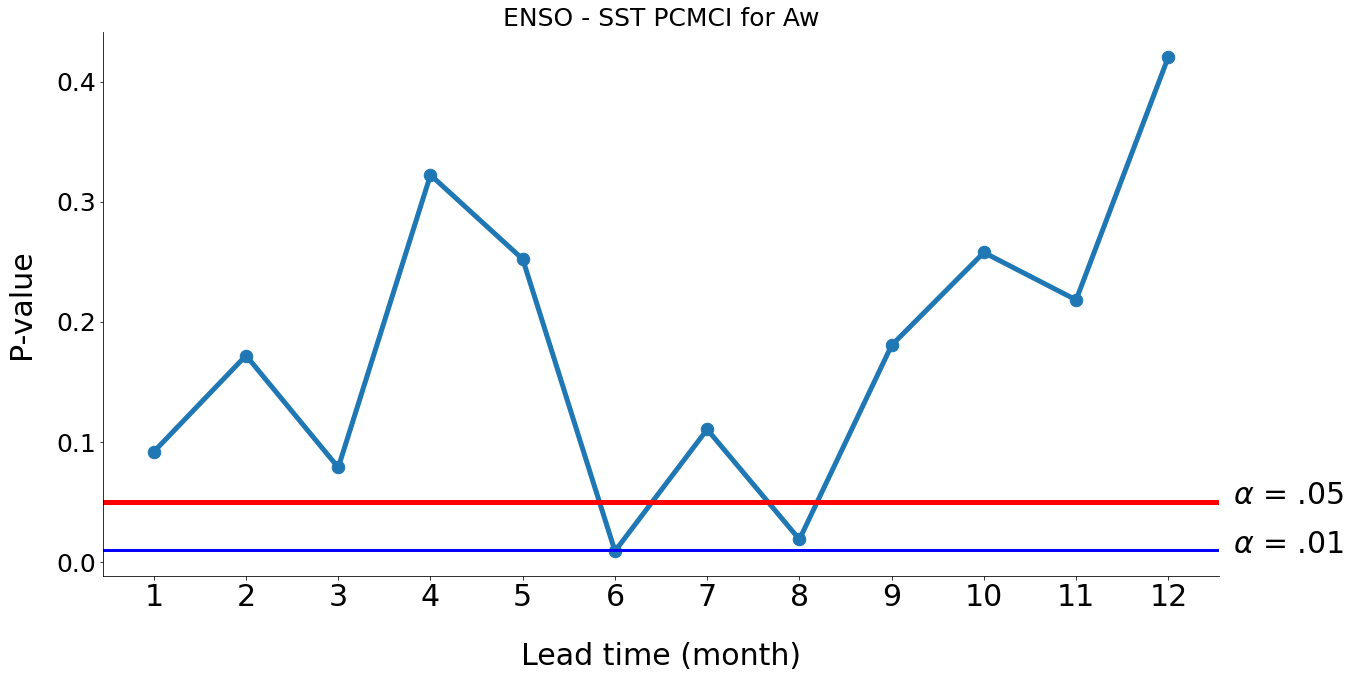

In [77]:
p_values = []
for i in range(12):
    d = enso[i,:] - SST_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
#axes.set_ylim([-0.03,0.3])
plt.title("ENSO - SST PCMCI for {}".format(cc), fontsize = 25)
#plt.savefig("./class_result_point/{}_p_pcmci_point.png".format(cc));  

In [146]:
diff = enso[11,:] - SST_pcmci[11,:]

In [148]:
diff[diff > 0] = 1

In [149]:
diff[diff <= 0] = 0

In [125]:
index

array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  12,  13,  14,  15,
        17,  24,  25,  26,  27,  28,  29,  31,  32,  33,  34,  35,  36,
        38,  40,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  55,
        57,  59,  61,  63,  64,  66,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  82,  83,  85,  87,  88,  89,  90,  91,
        92,  93,  95,  97,  98,  99, 100, 101, 102, 103, 105, 106, 109,
       110, 112])

In [150]:
d = Data("../../../nc/GPCC_africa_2.5.nc",'precip',missing_value=-9.96921e+36)

data = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [151]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

class_list = []
for i in range(len(lon_list)):
    lon_class, lat_class = lon_list[i], lat_list[i]
    if lon_class > 180: lon_class -= 360
    if (lat_class, lon_class) in class_dic.keys(): 
        class_list.append(class_dic[(lat_class, lon_class)])
    else:
        class_list.append(np.nan)

class_list = np.array(class_list)

In [152]:
class_index = (class_list == cc)

In [153]:
lon1 = np.arange(-23.75,59,2.5 )

deg = np.zeros((len(lat),len(lon1)))

In [154]:
lon_list = np.array(lon_list)
lat_list = np.array(lat_list)

In [155]:
class_lon = lon_list[np.where(class_index)[0][index]]
class_lat = lat_list[np.where(class_index)[0][index]]

In [156]:
df = pd.DataFrame({"lons":class_lon,"lats":class_lat})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

In [157]:
lat_number = deg.shape[0]
lon_number = deg.shape[1]

In [158]:
df["clusters"] = diff

In [159]:
for i in range(lat_number):
    for j in range(lon_number):
        if not df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df[(df.lats == lat[i]) & (df.lons == lon1[j])].clusters.values
        else:
            deg[i,j] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


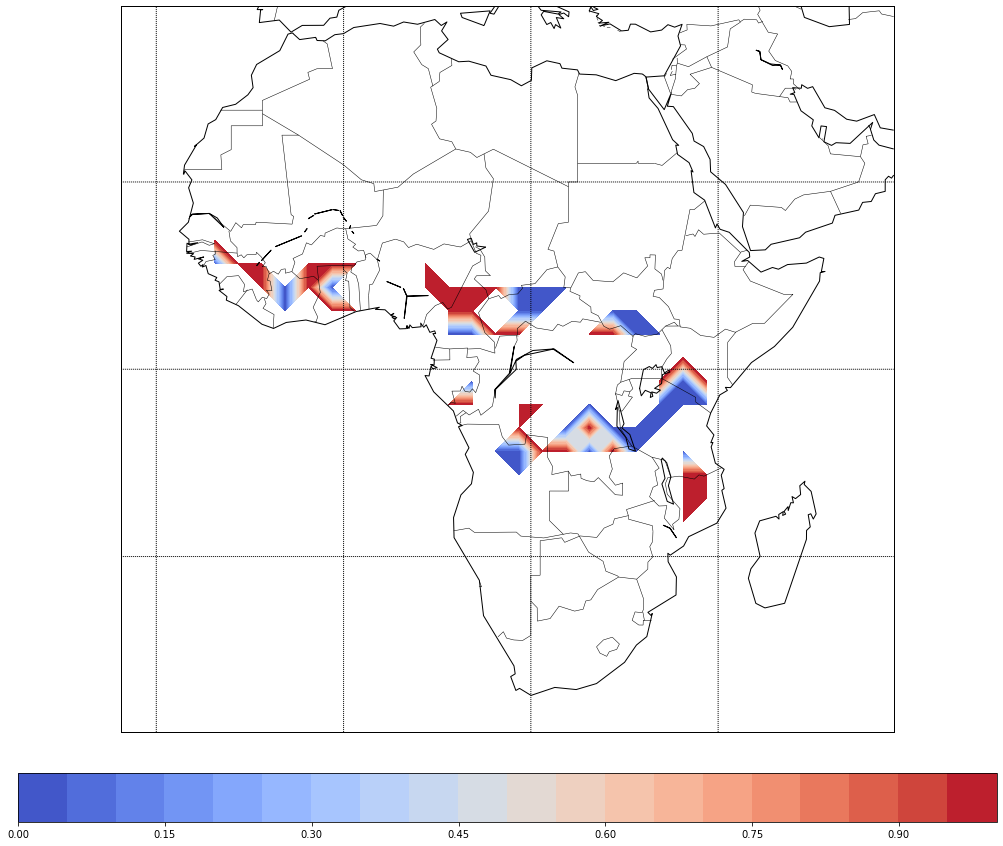

In [160]:
#deg_result[deg_result > 0] = 1

lon  = lon1
lat = lat
#m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
#  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
#  resolution='c')

m = Basemap(llcrnrlon=lon.min(), llcrnrlat=lat.min(),urcrnrlon=lon.max(),urcrnrlat=lat.max())

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon1,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
cbar = plt.colorbar(fraction=0.06,pad = 0.05,orientation="horizontal")
cbar.set_clim(-3, 3)
#cbar.ax.tick_params(labelsize=18)
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("areas_PCMCI_{}_cut.png".format(tau))

In [67]:
f = 12
step = 1
test_start = 2001
test_end = 2015
N = 40
cc ='Aw'
part = 1
index = np.load("{}_index.npy".format(cc))

index.sort()

In [68]:
base = np.zeros((12,N))
enso = np.zeros((12,N))

SST_corr = np.zeros((12,N))
SST_pcmci = np.zeros((12,N))

for tau in np.arange(1,13):
    for i, v in enumerate(index):
        base[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi_{}/base_{}_{}_{}_{}_{}.npy".format(cc,part,f,test_start,test_end,tau,v))
        enso[tau-1,i] = np.load("../../whole_data_results/{}/enso_spi_{}/model_{}_{}_{}_{}_{}.npy".format(cc,part,f,test_start,test_end,tau,v))
        SST_pcmci[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi_{}/model_{}_{}_{}_{}_{}.npy".format(cc,part,f,test_start,test_end,tau,v))
        SST_corr[tau-1,i] = np.load("../../whole_data_results/{}/corr_spi_{}/model_{}_{}_{}_{}_{}.npy".format(cc,part,f,test_start,test_end,tau,v))

In [70]:
d = base[11,:] - SST_pcmci[11,:]

In [71]:
d

array([ 0.11837886,  0.08383949,  0.1216381 ,  0.29690886, -0.0367851 ,
        0.10963939, -0.04502664, -0.01999126,  0.11198545,  0.07714802,
        0.15346646,  0.04047158,  0.08513512,  0.2214444 ,  0.14231162,
        0.13501777,  0.09000806,  0.14456193, -0.13741094,  0.0186059 ,
       -0.29394075, -0.03007276,  0.08484853,  0.20022249,  0.0904663 ,
        0.01061253,  0.14247188,  0.15935292,  0.23196625, -0.01759915,
        0.10048794,  0.22537869, -0.02199772,  0.05585114,  0.45448918,
        0.27146965,  0.25373851, -0.08537417,  0.12816763, -0.13966916])

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ENSO - SST PCMCI for Aw')

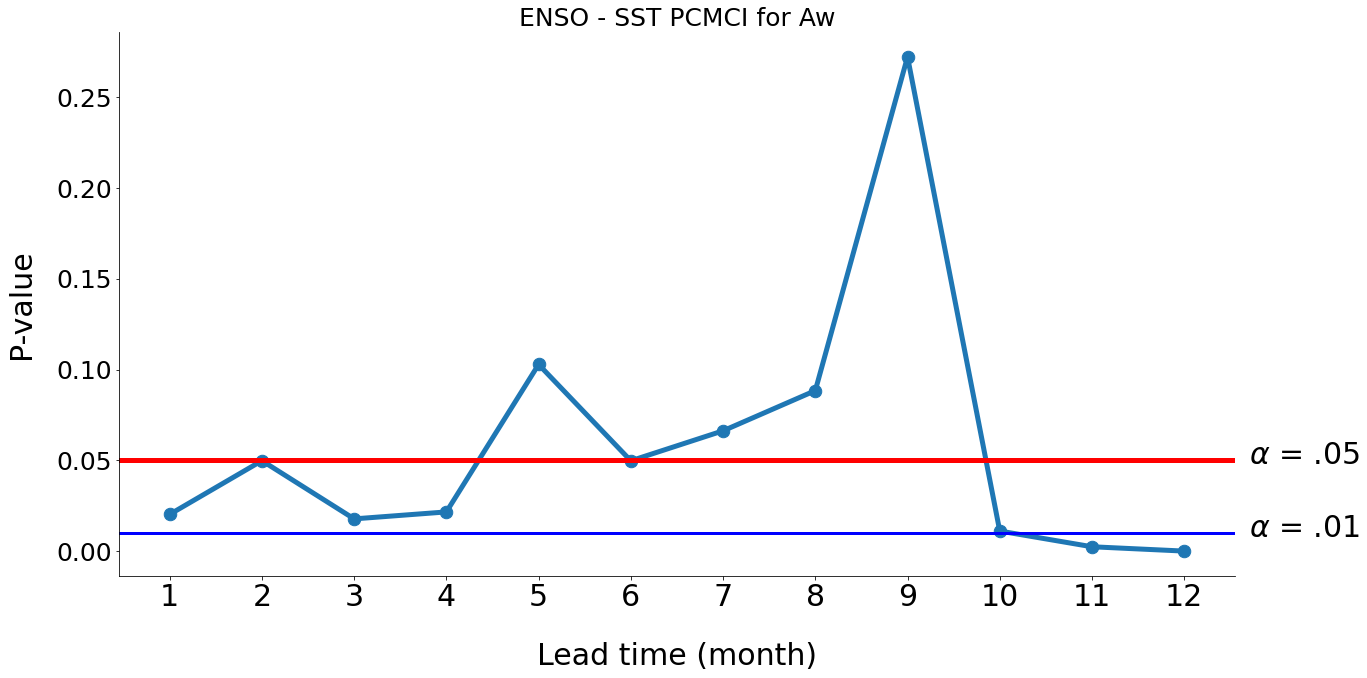

In [60]:
p_values = []
for i in range(12):
    d = base[i,:] - SST_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
#axes.set_ylim([-0.03,0.3])
plt.title("ENSO - SST PCMCI for {}".format(cc), fontsize = 25)
#plt.savefig("./class_result_point/{}_p_pcmci_point.png".format(cc));  

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ENSO - SST PCMCI for Aw')

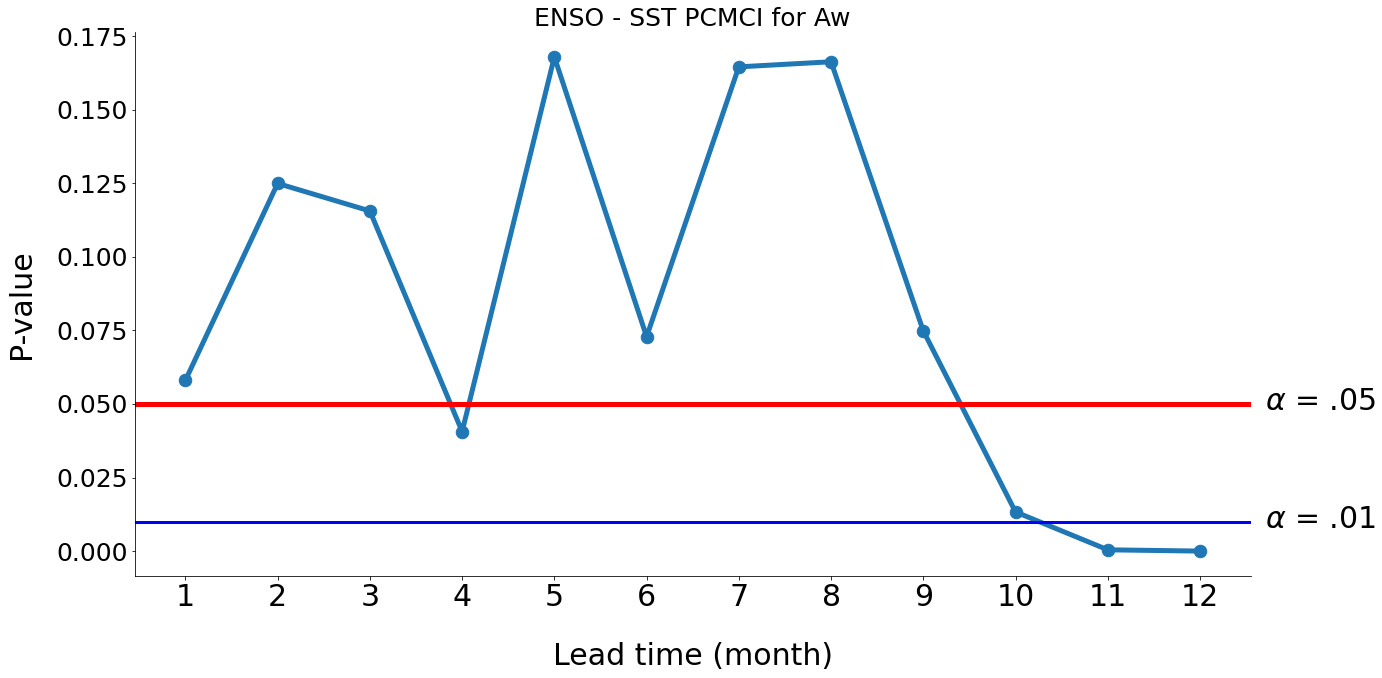

In [61]:
p_values = []
for i in range(12):
    d = base[i,:] - SST_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
#axes.set_ylim([-0.03,0.3])
plt.title("ENSO - SST PCMCI for {}".format(cc), fontsize = 25)
#plt.savefig("./class_result_point/{}_p_pcmci_point.png".format(cc));  

In [171]:
f = 12
step = 1
test_start = 2001
test_end = 2015
N = 40
cc ='Cfa'


index = np.load("{}_index.npy".format(cc))
index.sort()

In [172]:
base = np.zeros((12,N))
enso = np.zeros((12,N))

SST_corr = np.zeros((12,N))
SST_pcmci = np.zeros((12,N))

for tau in np.arange(1,13):
    for i, v in enumerate(index):
        base[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi/base_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        #enso[tau-1,i] = np.load("../../whole_data_results/{}/enso_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        SST_pcmci[tau-1,i] = np.load("../../whole_data_results/{}/pcmci_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))
        #SST_corr[tau-1,i] = np.load("../../whole_data_results/{}/corr_spi/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,v))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ENSO - SST PCMCI for Cfa')

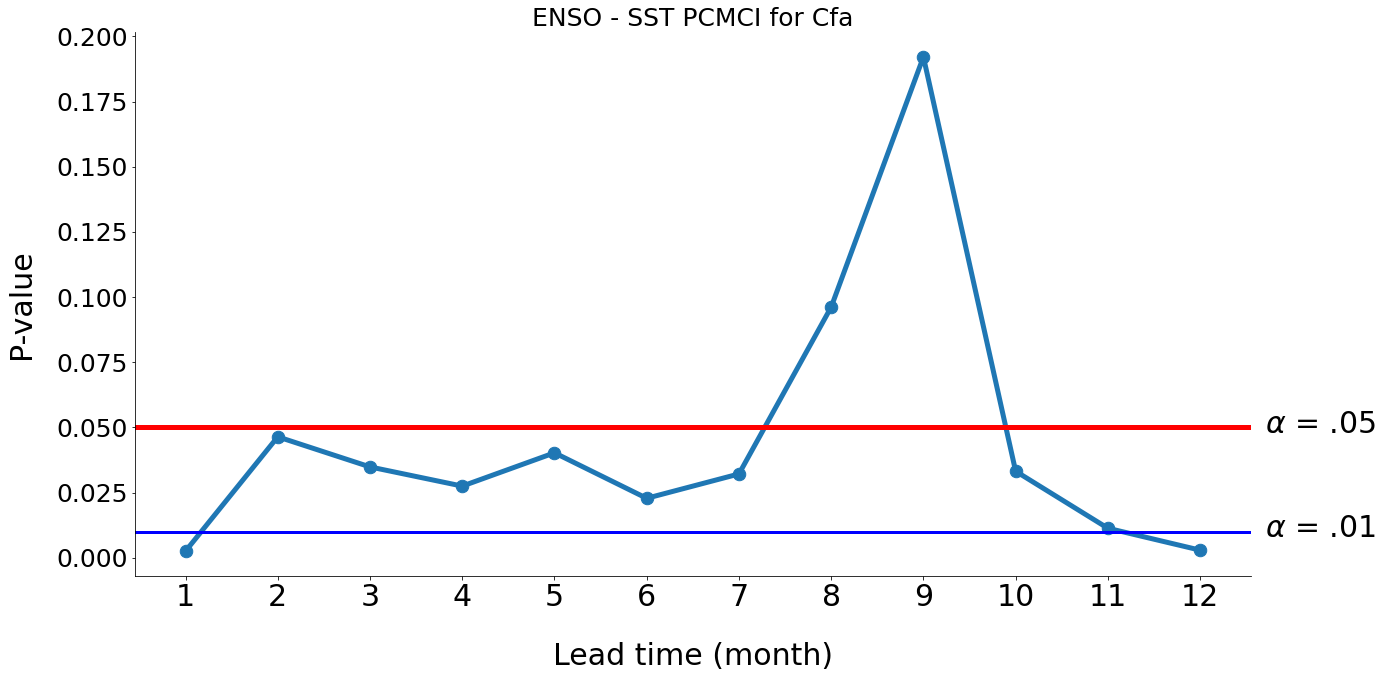

In [173]:
p_values = []
for i in range(12):
    d = base[i,:] - SST_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
#axes.set_ylim([-0.03,0.3])
plt.title("ENSO - SST PCMCI for {}".format(cc), fontsize = 25)
#plt.savefig("./class_result_point/{}_p_corr_point.png".format(cc));  

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ENSO - SST CORR for Aw')

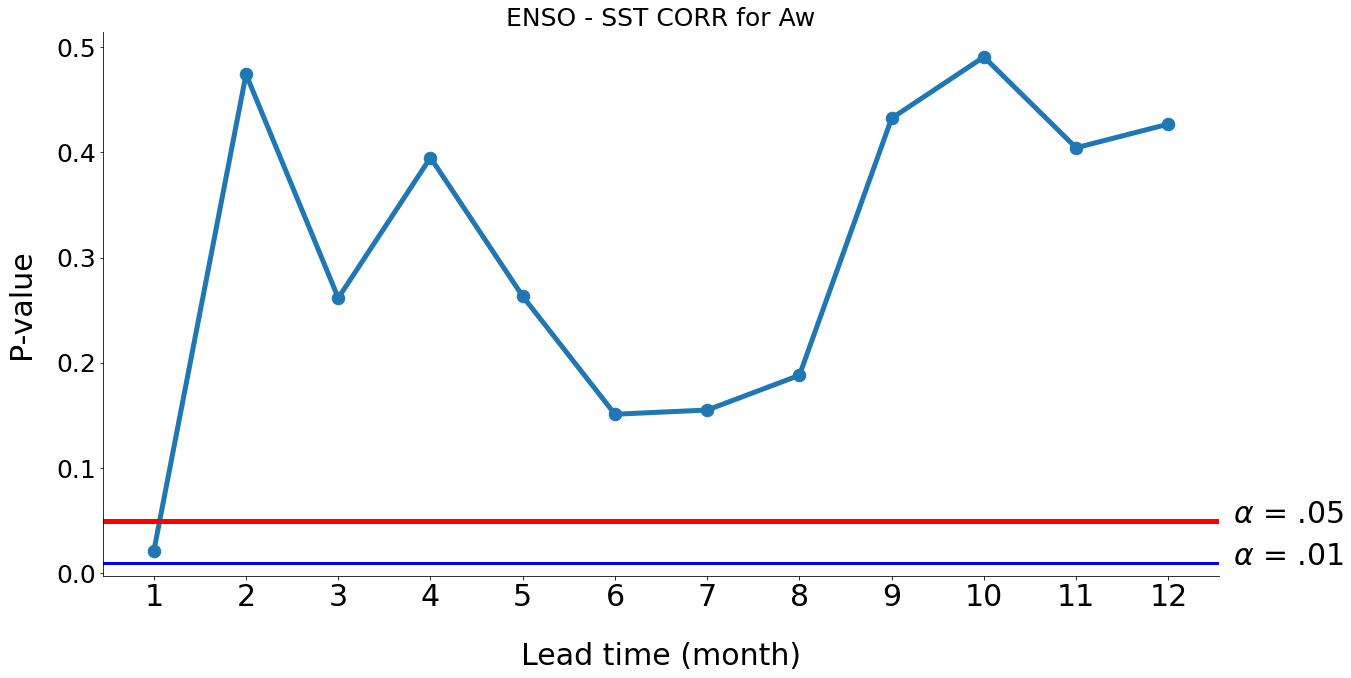

In [65]:
p_values = []
for i in range(12):
    d = base[i,:] - SST_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
#axes.set_ylim([-0.03,0.3])
plt.title("ENSO - SST CORR for {}".format(cc), fontsize = 25)
#plt.savefig("./class_result_point/{}_p_corr_point.png".format(cc));  

Tau:1 T:-0.9857028568487392 p:0.16517750220344124
Tau:2 T:-0.8292751921720966 p:0.20599787638086692
Tau:3 T:-1.48005762560053 p:0.07344571493502254
Tau:4 T:-0.7481010874614429 p:0.2294434488135671
Tau:5 T:-1.0786988399410844 p:0.14367430923686156
Tau:6 T:-0.8255063553813456 p:0.20705272721720586
Tau:7 T:-0.8409936155647956 p:0.20273924669923582
Tau:8 T:-1.1383199450774688 p:0.13096574136697695
Tau:9 T:1.357454515081829 p:0.09122025174457535
Tau:10 T:0.02988413955380481 p:0.48815593198922913
Tau:11 T:1.080530886303892 p:0.143271335509249
Tau:12 T:1.7230773629214207 p:0.046398011500522245


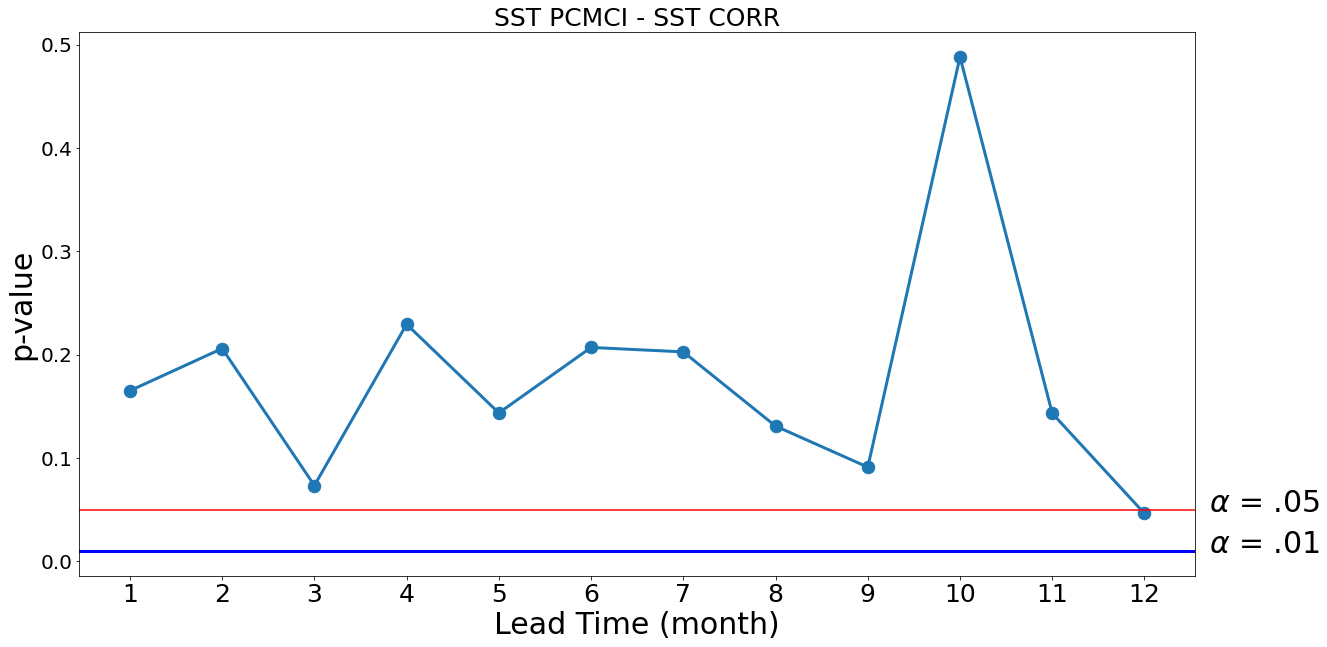

In [21]:
p_values = []
for i in range(12):
    d =  SST_pcmci[i,:] - SST_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.axhline(0.01, color = 'b',linewidth = 3)
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);

plt.title("SST PCMCI - SST CORR", fontsize = 25)
plt.savefig("./class_result_point/{}_p_pcmci_corr.png".format(cc)); 